In [1]:
# Parameters
import os
SIMULATTE_BASE_DIR = os.environ['SIMULATTE_BASE_DIR'] #"/Users/tiemokodembele/Documents/internShip/simulatte"
first_run = {"uid": 10, "simulationUid": 8, "name": "my runner", "description": "string", "createDate": 1656687580477, "trace": True, "dataSink": {"format": "JSON", "folderPath": f"{SIMULATTE_BASE_DIR}/data/ADS/loanvalidation", "uri": f"{SIMULATTE_BASE_DIR}/data/ADS/loanvalidation/run_my runner_20220701_165940.json", "username": "string", "password": "string", "uid": 26}, "decisionService": {"type": "ADS", "endPoint": "https://cpd-cp4a.apps.ads2201.cp.fyre.ibm.com/ads/runtime/api/v1/deploymentSpaces/embedded/decisions/_082392706%2Fbanking%2Fapproval_with_tasks%2FloanApprovalWithTasksDecisionService%2F1.1.0%2FloanApprovalWithTasksDecisionService-1.1.0.jar/operations/approvalWithTasks/execute", "authType": "ZEN_TOKEN", "username": "string", "password": "string", "key": "string", "value": "string", "token": "MDgyMjEzNzA2OjB6M3lwc29MZTJOOE1sQ2pDVDVSVXlmSHNXRDhDbjBKc1ZKZlN1aEI=", "headerPrefix": "string", "uid": 18}, "executor": {"type": "JSE", "mode": "REMOTE", "capability": "ODM", "uid": 10}, "runReport": {"uid": 10, "status": "FINISHED", "numberOfDecisions": 1000, "numberOfRequests": 1000, "progress": 1.0, "duration": 188812, "numberOfDecisionsPerSecond": 5.2962737}, "notebookUri": f"{SIMULATTE_BASE_DIR}/notebook/ads-vs-odm-loanvalidation-analytics.ipynb"}
second_run = {"uid": 11, "simulationUid": 8, "name": "my runner", "description": "string", "createDate": 1656687588353, "trace": True, "dataSink": {"format": "JSON", "folderPath": f"{SIMULATTE_BASE_DIR}/data/ADS/loanvalidation", "uri": f"{SIMULATTE_BASE_DIR}/data/ADS/loanvalidation/run_my runner_20220701_165948.json", "username": "string", "password": "string", "uid": 27}, "decisionService": {"type": "ADS", "endPoint": "https://cpd-cp4a.apps.ads2201.cp.fyre.ibm.com/ads/runtime/api/v1/deploymentSpaces/embedded/decisions/_082213706%2Fpf2%2Fapproval_with_tasks%2FapprovalWithTasks-2DecisionService%2F1.4.0%2FapprovalWithTasks-2DecisionService-1.4.0.jar/operations/approvalWithTasks/extendedExecute", "authType": "ZEN_TOKEN", "username": "string", "password": "string", "key": "string", "value": "string", "token": "MDgyMjEzNzA2OjB6M3lwc29MZTJOOE1sQ2pDVDVSVXlmSHNXRDhDbjBKc1ZKZlN1aEI=", "headerPrefix": "string", "uid": 19}, "executor": {"type": "JSE", "mode": "REMOTE", "capability": "ODM", "uid": 11}, "runReport": {"uid": 11, "status": "FINISHED", "numberOfDecisions": 1000, "numberOfRequests": 1000, "progress": 1.0, "duration": 188308, "numberOfDecisionsPerSecond": 5.3104486}, "notebookUri": f"{SIMULATTE_BASE_DIR}/notebook/ads-vs-odm-loanvalidation-analytics.ipynb"}


__INSTALL DEPENDENCIES__

In [3]:
%%capture 

!pip install pgeocode
!pip install deepdiff

__LIBRAIRIES IMPORT__

In [4]:
import os
import sys

import requests
import random 

import pandas as pd 
import numpy as np
import json

__RUNS SPEC COMPARISON__ 

In [5]:
from deepdiff import DeepDiff
runs_diff = json.dumps(DeepDiff(first_run, 
                                second_run, 
                                exclude_paths={"root['uid']", 
                                                "root['name']", 
                                                "root['description']", 
                                                "root['createDate']", 
                                                "root['dataSink']", 
                                                "root['decisionService']['authType']", 
                                                "root['decisionService']['token']", 
                                                "root['decisionService']['uid']", 
                                                "root['executor']", 
                                                "root['runReport']['uid']"
                                                })['values_changed'], indent=4)

print(runs_diff)

{
    "root['decisionService']['endPoint']": {
        "new_value": "https://cpd-cp4a.apps.ads2201.cp.fyre.ibm.com/ads/runtime/api/v1/deploymentSpaces/embedded/decisions/_082213706%2Fpf2%2Fapproval_with_tasks%2FapprovalWithTasks-2DecisionService%2F1.4.0%2FapprovalWithTasks-2DecisionService-1.4.0.jar/operations/approvalWithTasks/extendedExecute",
        "old_value": "https://cpd-cp4a.apps.ads2201.cp.fyre.ibm.com/ads/runtime/api/v1/deploymentSpaces/embedded/decisions/_082392706%2Fbanking%2Fapproval_with_tasks%2FloanApprovalWithTasksDecisionService%2F1.1.0%2FloanApprovalWithTasksDecisionService-1.1.0.jar/operations/approvalWithTasks/execute"
    },
    "root['runReport']['duration']": {
        "new_value": 188308,
        "old_value": 188812
    },
    "root['runReport']['numberOfDecisionsPerSecond']": {
        "new_value": 5.3104486,
        "old_value": 5.2962737
    }
}


In [6]:
runs_diff_labels = ["Simulation uid", "Trace", "Decision service type", "Decision service endpoint", "Number of decisions", "Number of requests", "run duration", "Number of executed decision per second", "run metrics/KPI"]

__READ DECISION SINK__

In [7]:
# data sink uris
datasink_v1_path = first_run["dataSink"]["uri"]
datasink_v2_path = second_run["dataSink"]["uri"]

outputDataV1 = []
outputDataV2 = []

if os.path.exists(datasink_v1_path):
    with open(datasink_v1_path) as file:
        filesize = os.path.getsize(datasink_v1_path)
        if filesize == 0:
            print("The file {} is empty".format(datasink_v1_path))
        else:
            while (line := file.readline().rstrip()):
                jsonLine = dict()
                line_to_json = json.loads(line)
                jsonLine["request"] = json.loads(line_to_json["request"])
                if(line_to_json["trace"]=="empty"):
                    jsonLine["trace"] = "empty"
                else:
                    jsonLine["trace"] = json.loads(line_to_json["trace"])
                jsonLine["response"] = json.loads(line_to_json["response"])

                outputDataV1.append(jsonLine)

if os.path.exists(datasink_v2_path):
    with open(datasink_v2_path) as file:
        filesize = os.path.getsize(datasink_v2_path)
        if filesize == 0:
            print("The file {} is empty".format(datasink_v2_path))
        else:
            while (line := file.readline().rstrip()):
                jsonLine = dict()
                line_to_json = json.loads(line)
                jsonLine["request"] = json.loads(line_to_json["request"])
                if(line_to_json["trace"]=="empty"): 
                    jsonLine["trace"] = "empty" 
                else: 
                    jsonLine["trace"] = json.loads(line_to_json["trace"])
                jsonLine["response"] = json.loads(line_to_json["response"])

                outputDataV2.append(jsonLine)

datasink_v1 = pd.json_normalize(outputDataV1)
datasink_v2 = pd.json_normalize(outputDataV2)

datasink_v1.head(5)
datasink_v2.head(5)

request.loan.amount  request.loan.loanToValue  \
0               783440                       0.7   
1              1787385                       0.7   
2              1733494                       0.7   
3              1350004                       0.7   
4              1210944                       0.7   

   request.loan.numberOfMonthlyPayments request.loan.startDate  \
0                                   162   2005-06-01T00:00:00Z   
1                                   183   2005-06-01T00:00:00Z   
2                                    75   2005-06-01T00:00:00Z   
3                                    72   2005-06-01T00:00:00Z   
4                                   160   2005-06-01T00:00:00Z   

  request.borrower.firstName request.borrower.lastName  \
0                       Kyle                  Anderson   
1                     Daniel                    Wagner   
2                   Danielle                    Miller   
3                   Jennifer                  Anderson   
4                 Jacqueline                 Rodriguez   

  request.borrower.zipCode  request.borrower.creditScore  \
0                    14994                           736   
1                    49604                           527   
2                    40495                           460   
3                    45410                           751   
4                    15397                           684   

  request.borrower.birthDate  request.borrower.yearlyIncome  ...  \
0       1903-05-12T00:00:00Z                         113243  ...   
1       1898-05-12T00:00:00Z                         224186  ...   
2       1988-05-12T00:00:00Z                          39954  ...   
3       1976-05-12T00:00:00Z                         219998  ...   
4       1988-05-12T00:00:00Z                          72470  ...   

  response.borrower.yearlyIncome response.borrower.spouse  \
0                         113243                     None   
1                         224186                     None   
2                          39954                     None   
3                         219998                     None   
4                          72470                     None   

  response.borrower.SSN.serialNumber response.borrower.SSN.areaNumber  \
0                               6789                              988   
1                               6789                              632   
2                               6789                              034   
3                               6789                              667   
4                               6789                              873   

  response.borrower.SSN.groupCode               response.__DecisionID__  \
0                              45  b9f096dd-feef-4d6a-8754-1308673c3a17   
1                              45  46fd078b-0471-459a-a82c-dda42b5ecef1   
2                              45  d7b363ad-8732-4144-8c73-ec46671f97d0   
3                              45  20a0aecb-afbb-455e-9388-67614dcf2249   
4                              45  e77f17de-7c04-4483-96a7-ebcc10909c64   

                                   response.messages response.dataValidated  \
0  [Too big Debt/Income ratio, Very low risk loan...                   True   
1                   [The loan cannot exceed 1300000]                  False   
2                   [The loan cannot exceed 1300000]                  False   
3                   [The loan cannot exceed 1300000]                  False   
4  [Too big Debt/Income ratio, Very low risk loan...                   True   

  response.yearlyInterestRate response.insurance  
0                       0.082                NaN  
1                       0.000                NaN  
2                       0.000                NaN  
3                       0.000                NaN  
4                       0.082                NaN  

[5 rows x 70 columns]

GET
- Total of approved amounts
- Total of requested amounts 
- f(yearlyIncome)=loanAmount

In [8]:
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pgeocode

#Graph configs
approval_colors = ["#00CC96", "#FF6692"]
color_indices = [0, 1]

pie_chart_approval_loan_names = ['approved', 'rejected']
pie_chart_loan_amount_names = ['approved amount', 'rejected amount']
bidirectional_bar_chart_label_v2=['number of applications', 'sum of applications amounts']
bidirectional_bar_chart_label_v1=['number of applications', 'sum of applications amounts']
bidirectional_bar_chart_label=['number of rejected applications', 'sum of rejected applications amounts', 'number of approved applications', 'sum of approved applications amounts']
radar_chart_labels=['number of rejected applications', 'sum of rejected applications amounts', 'number of approved applications', 'sum of approved applications amounts', 'ratio approved/requested']

Metrics

In [9]:
########### V2 #############
select_approved_decision_v2 = '`response.approved` == True'
select_rejected_decision_v2 = '`response.approved` == False'

get_decision_approval_v2 = 'response.approved'
get_decision_amount_v2 = 'response.loan.amount'
get_decision_borrower_zipcode_v2 = 'response.borrower.zipCode'
get_decision_borrower_yearly_income_v2 = 'response.borrower.yearlyIncome'
get_decision_borrower_credit_score_v2 = "response.borrower.creditScore"
get_decision_id_v2 = 'response.__DecisionID__'
get_decision_reimbursement_rate_v2 = 'response.yearlyInterestRate'
get_decision_monthly_repayment_v2 = 'response.monthlyRepayment'

########### V2 #############
select_approved_decision_v1 = '`response.approved` == True'
select_rejected_decision_v1 = '`response.approved` == False'

get_decision_approval_v1 = 'response.approved'
get_decision_amount_v1 = 'response.loan.amount'
get_decision_borrower_zipcode_v1 = 'response.borrower.zipCode'
get_decision_borrower_yearly_income_v1 = 'request.borrower.yearlyIncome'
get_decision_borrower_credit_score_v1 = "request.borrower.creditScore"
get_decision_id_v1 = 'response.__DecisionID__'
get_decision_reimbursement_rate_v1 = 'response.yearlyInterestRate'
get_decision_monthly_repayment_v1 = 'response.monthlyRepayment'


KPIs

In [10]:
########### ADS #############
approved_loan_v2 = datasink_v2.query(select_approved_decision_v2)
rejected_loan_v2 = datasink_v2.query(select_rejected_decision_v2)


########### V1 #############
approved_loan_v1 = datasink_v1.query(select_approved_decision_v1)
rejected_loan_v1 = datasink_v1.query(select_rejected_decision_v1)




########### Approved/Rejected PRINT #############
print("V2 : Number of approved loan request = ", approved_loan_v2.shape[0])
print("V2 : Number of rejected loan request = ", rejected_loan_v2.shape[0])
print("V2 : Rate of approval = ", approved_loan_v2.shape[0]/datasink_v2.shape[0])

print("V1 : Number of approved loan request = ", approved_loan_v1.shape[0])
print("V1 : Number of rejected loan request = ", rejected_loan_v1.shape[0])
print("V1 : Rate of approval = ", approved_loan_v1.shape[0]/datasink_v1.shape[0])


########### Approved/Rejected Amount PRINT #############
print("V2 : Total approved amount = ",datasink_v2.query(select_approved_decision_v2)[get_decision_amount_v2].sum())
print("V2 : Total rejected amount = ",datasink_v2.query(select_rejected_decision_v2)[get_decision_amount_v2].sum())
print("V2 : Total requested amount = ",datasink_v2[get_decision_amount_v2].sum())

print("V1 : Total approved amount = ",datasink_v1.query(select_approved_decision_v1)[get_decision_amount_v1].sum())
print("V1 : Total rejected amount = ",datasink_v1.query(select_rejected_decision_v1)[get_decision_amount_v1].sum())
print("V1 : Total requested amount = ",datasink_v1[get_decision_amount_v1].sum())

V2 : Number of approved loan request =  178
V2 : Number of rejected loan request =  822
V2 : Rate of approval =  0.178
V1 : Number of approved loan request =  208
V1 : Number of rejected loan request =  792
V1 : Rate of approval =  0.208
V2 : Total approved amount =  49815559
V2 : Total rejected amount =  942387827
V2 : Total requested amount =  992203386
V1 : Total approved amount =  64180314
V1 : Total rejected amount =  928023072
V1 : Total requested amount =  992203386


Visualization

__DONUT CHART__

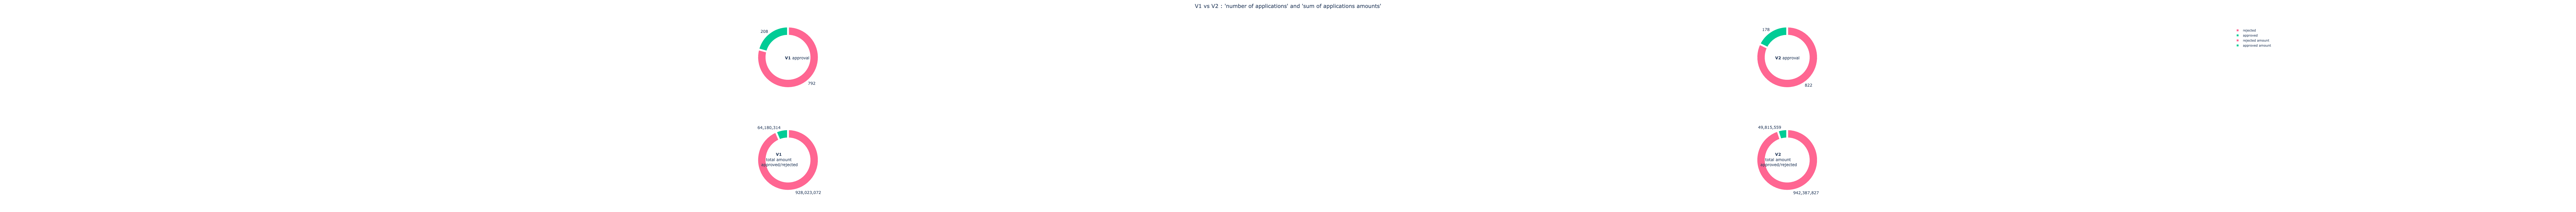

In [11]:
########### settings ###########
donut_hole = 0.7

########### Approved/Rejected PIE CHART #############
trace_approval_v2 = go.Pie(labels = pie_chart_approval_loan_names,
                            values = [approved_loan_v2.shape[0], rejected_loan_v2.shape[0]],
                            hole = donut_hole)
trace_approval_v1 = go.Pie(labels = pie_chart_approval_loan_names,
                            values = [approved_loan_v1.shape[0], rejected_loan_v1.shape[0]],
                            hole = donut_hole)


########### Approved/Rejected Amount PIE CHART #############
trace_amount_v2 = go.Pie(values= [datasink_v2.query(select_approved_decision_v2)[get_decision_amount_v2].sum(),
                                 datasink_v2.query(select_rejected_decision_v2)[get_decision_amount_v2].sum()],
                            labels=pie_chart_loan_amount_names,
                            hole = donut_hole,
                            name="Loan amount ADS")
trace_amount_v1 = go.Pie(values=[datasink_v1.query(select_approved_decision_v1)[get_decision_amount_v1].sum(),
                                datasink_v1.query(select_rejected_decision_v1)[get_decision_amount_v1].sum()],
                            labels=pie_chart_loan_amount_names,
                           hole = donut_hole,
                            name="Loan amount V1")

fig = make_subplots(rows=2, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]],
                    column_widths=[0.5, 0.5],
                    #vertical_spacing=0.001,
                    subplot_titles=("V1 approval", "ADS approval", "V1 approved/rejected amount", "ADS approved/rejected amount")
                    )

fig.add_trace(trace_approval_v1, row=1, col=1)
fig.add_trace(trace_approval_v2, row=1, col=2)
fig.add_trace(trace_amount_v1, row=2, col=1)
fig.add_trace(trace_amount_v2, row=2, col=2)

fig.update_traces(hoverinfo='label', textinfo='value', textfont_size=15, textposition="outside",
                  marker=dict(colors=approval_colors, line=dict(color='#FFFFFF', width=7)))
                
fig.update_annotations(yshift=20) # subplot tiltes

fig.update_layout(
    barmode='stack',
    plot_bgcolor = "white",
    #paper_bgcolor = 'lightgray',
    height=800,
    title={'text': f"V1 vs V2 : 'number of applications' and 'sum of applications amounts'",
          'x':0.5,
          'y':0.98,
          'xanchor': 'center',
          'font_size': 20
    },
    annotations= [
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>V1</b><br>total amount<br> approved/rejected",
            "x": 0.22,
            "y": 0.11
         },
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>V2</b><br>total amount<br> approved/rejected",
            "x": 0.77,
            "y": 0.11
         },
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>V1</b> approval",
            "x": 0.23,
            "y": 0.76
         },
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>V2</b> approval",
            "x": 0.775,
            "y": 0.76
         }
      ],
      )

iplot(fig)

__SCATTER CHART__

In [12]:
def array_normalize(values, max_value=1):
    normalized_values = []
    for value in values:
        normalized_values.append((value*max_value)/max(values))
    return normalized_values

def set_colors(values, true_color="#00CC96", false_color="#FF6692"):
    colors = []
    for value in values:
        if(value): 
            colors.append(true_color) 
        else: 
            colors.append(false_color) 
    return colors

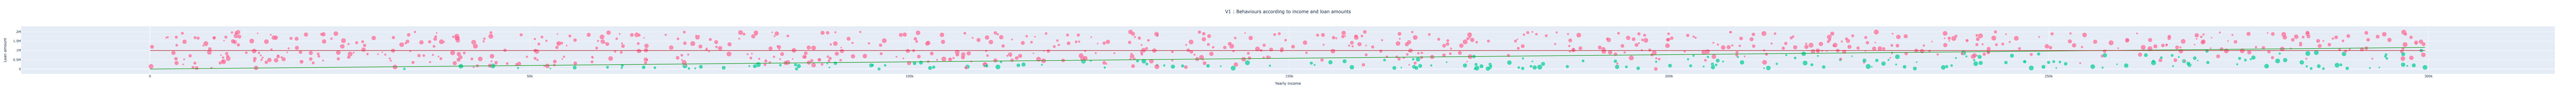

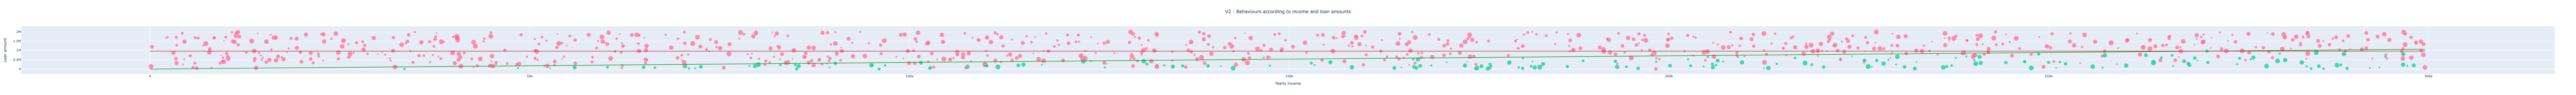

In [13]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
                 x=datasink_v1[get_decision_borrower_yearly_income_v1],
                 y=datasink_v1[get_decision_amount_v1],
                 mode='markers',
                 marker_size=array_normalize(datasink_v1[get_decision_borrower_credit_score_v1], 20), 
                 marker_color=set_colors(datasink_v1[get_decision_approval_v1]),
                 text=datasink_v1[get_decision_approval_v1], 
                 hovertext=datasink_v1[get_decision_id_v1],
                 hovertemplate="<b>Income:</b> %{x}<br><b>Loan amount:</b> %{y}<br><b>Approval:</b> %{text}<br><b>Id:</b> %{hovertext}<extra></extra>",
                 name='V1'
))


fig1.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v1[get_decision_borrower_yearly_income_v1])]),
        y=max(datasink_v1.query(select_approved_decision_v1)[get_decision_amount_v1]/datasink_v1.query(select_approved_decision_v1)[get_decision_borrower_yearly_income_v1])*np.array([0, max(datasink_v1[get_decision_borrower_yearly_income_v1])]),
        mode="lines",
        line=go.scatter.Line(color="#109618"),
        showlegend=False)
)
fig1.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v1[get_decision_borrower_yearly_income_v1])]),
        y=max(datasink_v1.query(select_approved_decision_v1)[get_decision_amount_v1])*np.array([1, 1]),
        mode="lines",
        line=go.scatter.Line(color="#B82E2E"), ##B82E2E
        showlegend=False)
)


fig2 = go.Figure()
fig2.add_trace(go.Scatter(
                 x=datasink_v2[get_decision_borrower_yearly_income_v2],
                 y=datasink_v2[get_decision_amount_v2],
                 mode='markers',
                 marker_size=array_normalize(datasink_v2[get_decision_borrower_credit_score_v2], 20), 
                 marker_color=set_colors(datasink_v2[get_decision_approval_v2]),
                 text=datasink_v2[get_decision_approval_v2], 
                 hovertext=datasink_v2[get_decision_id_v2],
                 hovertemplate="<b>Income:</b> %{x}<br><b>Loan amount:</b> %{y}<br><b>Approval:</b> %{text}<br><b>Id:</b> %{hovertext}<extra></extra>",
                 name='V1'
))


fig2.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v2[get_decision_borrower_yearly_income_v2])]),
        y=max(datasink_v2.query(select_approved_decision_v2)[get_decision_amount_v2]/datasink_v2.query(select_approved_decision_v2)[get_decision_borrower_yearly_income_v2])*np.array([0, max(datasink_v2[get_decision_borrower_yearly_income_v2])]),
        mode="lines",
        line=go.scatter.Line(color="#109618"),
        showlegend=False)
)
fig2.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v2[get_decision_borrower_yearly_income_v2])]),
        y=max(datasink_v2.query(select_approved_decision_v2)[get_decision_amount_v2])*np.array([1, 1]),
        mode="lines",
        name='<b>Max amount</b> horizontal bar',
        line=go.scatter.Line(color="#B82E2E"), ##B82E2E
        showlegend=False)
)

"""
fig = make_subplots(rows=1, cols=2,
                    specs=[[{},{}]],
                    subplot_titles=("V1", "V2")
                    )
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)

fig.update_layout(
    barmode='stack', 
    title={'text': f"creditScore vs Income",
          'x':0.5,
          'xanchor': 'center'
    })
"""

fig1.update_xaxes(title_text='Yearly income')
fig1.update_yaxes(title_text='Loan amount')

fig1.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"V1 : Behaviours according to income and loan amounts",
          'x':0.5,
          'xanchor': 'center'
    })


fig2.update_xaxes(title_text='Yearly income')
fig2.update_yaxes(title_text='Loan amount')

fig2.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"V2 : Behaviours according to income and loan amounts",
          'x':0.5,
          'xanchor': 'center'
    })

iplot(fig1)
iplot(fig2)

INTEREST RATE 

Pente 1 :  0.36724378382351425
Pente 2 :  0.32919312689700647


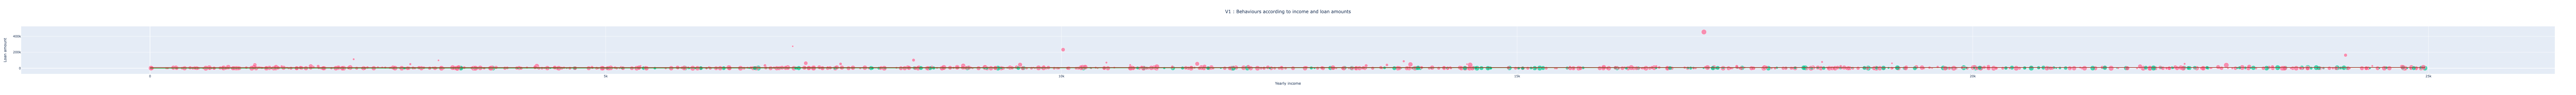

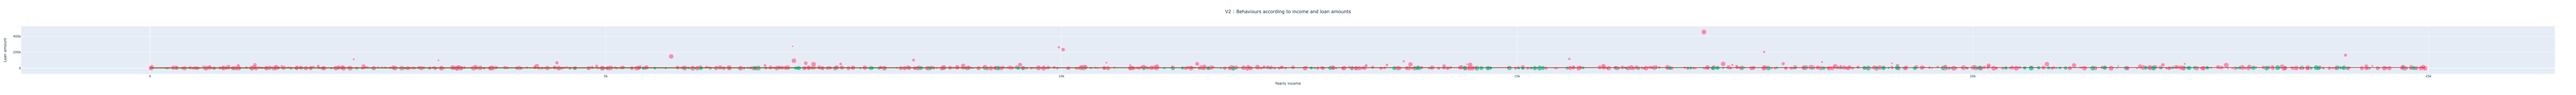

In [14]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
                 x=datasink_v1[get_decision_borrower_yearly_income_v1]/12,
                 y=datasink_v1[get_decision_monthly_repayment_v1],
                 mode='markers',
                 marker_size=array_normalize(datasink_v1[get_decision_borrower_credit_score_v1], 20), 
                 marker_color=set_colors(datasink_v1[get_decision_approval_v1]),
                 text=datasink_v1[get_decision_approval_v1], 
                 hovertext=datasink_v1[get_decision_id_v1],
                 hovertemplate="<b>Income:</b> %{x}<br><b>Repayment:</b> %{y}<br><b>Approval:</b> %{text}<br><b>Id:</b> %{hovertext}<extra></extra>",
                 name='V1'
))

pente1 = max(datasink_v1.query(select_approved_decision_v1)[get_decision_monthly_repayment_v1]*12/datasink_v1.query(select_approved_decision_v1)[get_decision_borrower_yearly_income_v1])
fig1.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v1[get_decision_borrower_yearly_income_v1]/12)]),
        y=pente1*np.array([0, max(datasink_v1[get_decision_borrower_yearly_income_v1]/12)]),
        mode="lines",
        line=go.scatter.Line(color="#109618"),
        showlegend=False)
)
fig1.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v1[get_decision_borrower_yearly_income_v1]/12)]),
        y=max(datasink_v1.query(select_approved_decision_v1)[get_decision_monthly_repayment_v1])*np.array([1, 1]),
        mode="lines",
        line=go.scatter.Line(color="#B82E2E"), ##B82E2E
        showlegend=False)
)


fig2 = go.Figure()
fig2.add_trace(go.Scatter(
                 x=datasink_v2[get_decision_borrower_yearly_income_v2]/12,
                 y=datasink_v2[get_decision_monthly_repayment_v2],
                 mode='markers',
                 marker_size=array_normalize(datasink_v2[get_decision_borrower_credit_score_v2], 20), 
                 marker_color=set_colors(datasink_v2[get_decision_approval_v2]),
                 text=datasink_v2[get_decision_approval_v2], 
                 hovertext=datasink_v2[get_decision_id_v2],
                 hovertemplate="<b>Income:</b> %{x}<br><b>Repayment:</b> %{y}<br><b>Approval:</b> %{text}<br><b>Id:</b> %{hovertext}<extra></extra>",
                 name='V1'
))

pente2 = max(datasink_v2.query(select_approved_decision_v2)[get_decision_monthly_repayment_v2]*12/datasink_v2.query(select_approved_decision_v2)[get_decision_borrower_yearly_income_v2])
fig2.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v2[get_decision_borrower_yearly_income_v2]/12)]),
        y=pente2*np.array([0, max(datasink_v2[get_decision_borrower_yearly_income_v2]/12)]),
        mode="lines",
        line=go.scatter.Line(color="#109618"),
        showlegend=False)
)
fig2.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_v2[get_decision_borrower_yearly_income_v2]/12)]),
        y=max(datasink_v2.query(select_approved_decision_v2)[get_decision_monthly_repayment_v2])*np.array([1, 1]),
        mode="lines",
        name='<b>Max amount</b> horizontal bar',
        line=go.scatter.Line(color="#B82E2E"), ##B82E2E
        showlegend=False)
)

print("Pente 1 : ",pente1)
print("Pente 2 : ",pente2)

"""
fig = make_subplots(rows=1, cols=2,
                    specs=[[{},{}]],
                    subplot_titles=("V1", "V2")
                    )
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)

fig.update_layout(
    barmode='stack', 
    title={'text': f"creditScore vs Income",
          'x':0.5,
          'xanchor': 'center'
    })
"""

fig1.update_xaxes(title_text='Yearly income')
fig1.update_yaxes(title_text='Loan amount')

fig1.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"V1 : Behaviours according to income and loan amounts",
          'x':0.5,
          'xanchor': 'center'
    })


fig2.update_xaxes(title_text='Yearly income')
fig2.update_yaxes(title_text='Loan amount')

fig2.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"V2 : Behaviours according to income and loan amounts",
          'x':0.5,
          'xanchor': 'center'
    })

iplot(fig1)
iplot(fig2)

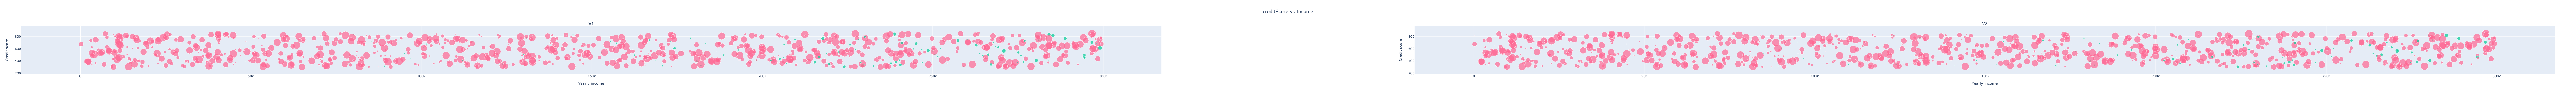

In [15]:
############ SCATTER CHART #############
max_marker_size = 30
trace_scatter_v1 = go.Scatter(
                 x=datasink_v1[get_decision_borrower_yearly_income_v1],
                 y=datasink_v1[get_decision_borrower_credit_score_v1],
                 mode='markers',
                 marker_size=array_normalize(datasink_v1[get_decision_amount_v1], max_marker_size), 
                 marker_color=set_colors(datasink_v1[get_decision_approval_v1]),
                 text=datasink_v1[get_decision_approval_v1], 
                 hovertemplate="<b>Income:</b> %{x}<br><b>creditScore:</b> %{y}<br><b>Approval:</b> %{text}<extra></extra>",
                 name='V1'
)

trace_scatter_v2 = go.Scatter(
                 x=datasink_v2[get_decision_borrower_yearly_income_v2],
                 y=datasink_v2[get_decision_borrower_credit_score_v2],
                 mode='markers',
                 marker_size=array_normalize(datasink_v2[get_decision_amount_v2], max_marker_size), 
                 marker_color=set_colors(datasink_v2[get_decision_approval_v2]),
                 text=datasink_v2[get_decision_approval_v2], 
                 hovertemplate="<b>Income:</b> %{x}<br><b>creditScore:</b> %{y}<br><b>Approval:</b> %{text}<extra></extra>",
                 name='V2',
)

fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "scatter"},{"type": "scatter"}]],
                    subplot_titles=("V1", "V2")
                    )
fig.add_trace(trace_scatter_v1, row=1, col=1)
fig.add_trace(trace_scatter_v2, row=1, col=2)

fig.update_xaxes(title_text='Yearly income')
fig.update_yaxes(title_text='Credit score')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"creditScore vs Income",
          'x':0.5,
          'xanchor': 'center'
    })

iplot(fig)

DIFF SCATTER 

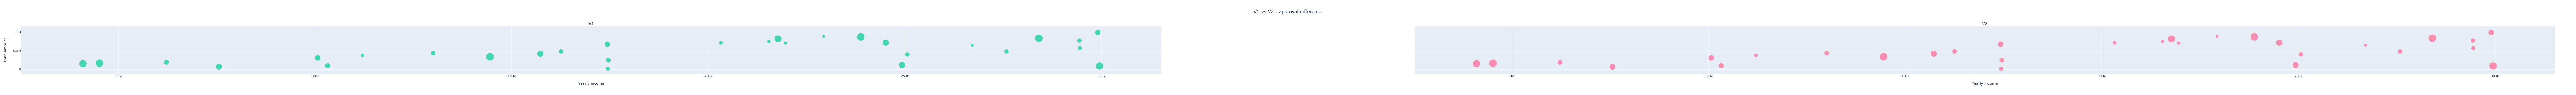

In [16]:
outputDataDiffV1 = []
outputDataDiffV2 = []
for number_of_decision in range(0, max(len(outputDataV1), len(outputDataV2))):
    if(outputDataV1[number_of_decision]['response']['approved']!=outputDataV2[number_of_decision]['response']['approved']):
        if(outputDataV1[number_of_decision]): outputDataDiffV1.append(outputDataV1[number_of_decision]) 
        if(outputDataV2[number_of_decision]): outputDataDiffV2.append(outputDataV2[number_of_decision])

datasink_diff_v1 = pd.json_normalize(outputDataDiffV1)
datasink_diff_v2 = pd.json_normalize(outputDataDiffV2)


############ SCATTER CHART #############
max_marker_size = 30
trace_scatter_v1 = go.Scatter(
                 x=datasink_diff_v1[get_decision_borrower_yearly_income_v1],
                 y=datasink_diff_v1[get_decision_amount_v1],
                 mode='markers',
                 marker_size=array_normalize(datasink_diff_v1[get_decision_borrower_credit_score_v1], max_marker_size), 
                 marker_color=set_colors(datasink_diff_v1[get_decision_approval_v1]),
                 text=datasink_diff_v1[get_decision_approval_v1], 
                 hovertemplate="<b>Income:</b> %{x}<br><b>creditScore:</b> %{y}<br><b>Approval:</b> %{text}<extra></extra>",
                 name='V1'
)

trace_scatter_v2 = go.Scatter(
                 x=datasink_diff_v2[get_decision_borrower_yearly_income_v2],
                 y=datasink_diff_v2[get_decision_amount_v2],
                 mode='markers',
                 marker_size=array_normalize(datasink_diff_v2[get_decision_borrower_credit_score_v2], max_marker_size), 
                 marker_color=set_colors(datasink_diff_v2[get_decision_approval_v2]),
                 text=datasink_diff_v2[get_decision_approval_v2], 
                 hovertemplate="<b>Income:</b> %{x}<br><b>creditScore:</b> %{y}<br><b>Approval:</b> %{text}<extra></extra>",
                 name='V2',
)

fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "scatter"},{"type": "scatter"}]],
                    shared_yaxes=True,
                    subplot_titles=("V1", "V2")
                    )
fig.add_trace(trace_scatter_v1, row=1, col=1)
fig.add_trace(trace_scatter_v2, row=1, col=2)

fig.update_xaxes(title_text='Yearly income')
fig.update_yaxes(title_text='Loan amount', row=1, col=1)

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"V1 vs V2 : approval difference",
          'x':0.5,
          'xanchor': 'center'
    })

iplot(fig)

__BIDIRECTIONAL BAR CHARTS__

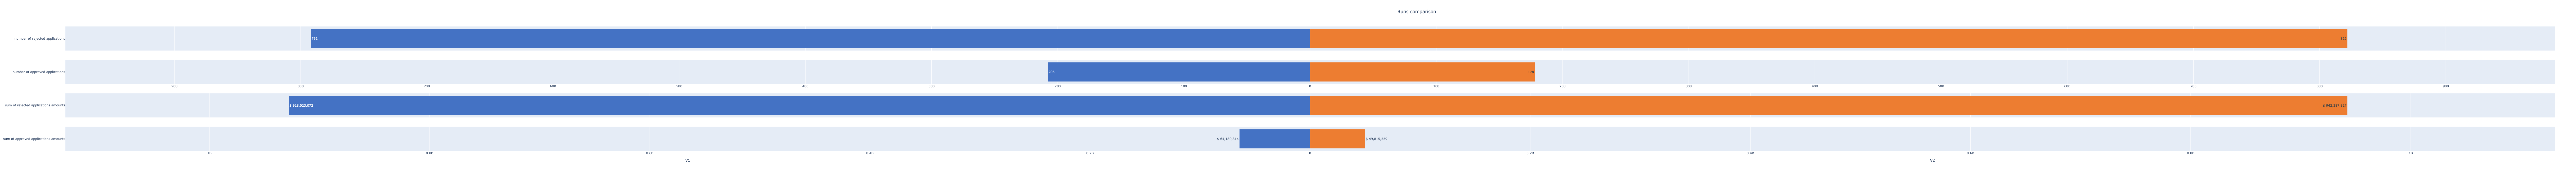

In [17]:
fig = make_subplots(rows=4, cols=2, specs=[[{}, {}], [{}, {}], [{}, {}], [{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0)

rejected_loan=[datasink_v1.query(select_rejected_decision_v1).shape[0], datasink_v2.query(select_rejected_decision_v2).shape[0]]
rejected_loan_amount=[datasink_v1.query(select_rejected_decision_v1)[get_decision_amount_v1].sum(), datasink_v2.query(select_rejected_decision_v2)[get_decision_amount_v2].sum()]
approved_loan=[datasink_v1.query(select_approved_decision_v1).shape[0], datasink_v2.query(select_approved_decision_v2).shape[0]]
approved_loan_amount=[datasink_v1.query(select_approved_decision_v1)[get_decision_amount_v1].sum(), datasink_v2.query(select_approved_decision_v2)[get_decision_amount_v2].sum()]


fig.append_trace(go.Bar(
    y=['number of rejected applications'],
    x=[rejected_loan[0]],
    name='Rejected',
    text="{:,}".format(rejected_loan[0]),
    textposition='inside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 1, 1)
fig.append_trace(go.Bar(
    y=['number of rejected applications'],
    x=[rejected_loan[1]],
    name='Rejected',
    text="{:,}".format(rejected_loan[1]),
    #base=0,
    textposition='inside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 1, 2)

fig.append_trace(go.Bar(
    y=['number of approved applications'],
    x=[approved_loan[0]],
    name='Approved',
    text="{:,}".format(approved_loan[0]),
    textposition='inside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 2, 1)
fig.append_trace(go.Bar(
    y=['number of approved applications'],
    x=[approved_loan[1]],
    name='Approved',
    text="{:,}".format(approved_loan[1]),
    #base=0,
    textposition='inside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 2, 2)

fig.append_trace(go.Bar(
    y=['sum of rejected applications amounts'],
    x=[rejected_loan_amount[0]],
    name='Rejected',
    text="$ {:,}".format(rejected_loan_amount[0]),
    textposition='inside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 3, 1)
fig.append_trace(go.Bar(
    y=['sum of rejected applications amounts'],
    x=[rejected_loan_amount[1]],
    name='Rejected',
    text="$ {:,}".format(rejected_loan_amount[1]),
    #base=0,
    textposition='inside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 3, 2)

fig.append_trace(go.Bar(
    y=['sum of approved applications amounts'],
    x=[approved_loan_amount[0]],
    name='Approved',
    text="$ {:,}".format(approved_loan_amount[0]),
    textposition='outside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 4, 1)
fig.append_trace(go.Bar(
    y=['sum of approved applications amounts'],
    x=[approved_loan_amount[1]],
    name='Approved',
    text="$ {:,}".format(approved_loan_amount[1]),
    #base=0,
    textposition='outside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 4, 2)

butterfly_amount_view_width_ratio = max([datasink_v2.query(select_rejected_decision_v2)[get_decision_amount_v2].sum(),
                                        datasink_v2.query(select_approved_decision_v2)[get_decision_amount_v2].sum(),
                                        datasink_v1.query(select_rejected_decision_v1)[get_decision_amount_v2].sum(),
                                        datasink_v1.query(select_approved_decision_v1)[get_decision_amount_v2].sum()]) * 1.2

butterfly_approval_view_width_ratio = max([datasink_v2.query(select_rejected_decision_v2).shape[0],
                                        datasink_v2.query(select_approved_decision_v2).shape[0],
                                        datasink_v1.query(select_rejected_decision_v1).shape[0],
                                        datasink_v1.query(select_approved_decision_v1).shape[0]]) * 1.2

fig.update_xaxes(showticklabels=False, row=1, col=1, range=[butterfly_approval_view_width_ratio, 0])
fig.update_xaxes(showticklabels=False, row=1, col=2, range=[0, butterfly_approval_view_width_ratio])

fig.update_xaxes(showticklabels=True, row=2, col=1, range=[butterfly_approval_view_width_ratio, 0])
fig.update_xaxes(showticklabels=True, row=2, col=2, range=[0, butterfly_approval_view_width_ratio])

fig.update_xaxes(showticklabels=False, row=3, col=1, range=[butterfly_amount_view_width_ratio, 0])
fig.update_xaxes(showticklabels=False, row=3, col=2, range=[0, butterfly_amount_view_width_ratio])

fig.update_xaxes(showticklabels=True, title_text="V1", row=4, col=1, range=[butterfly_amount_view_width_ratio, 0])
fig.update_xaxes(showticklabels=True, title_text="V2", row=4, col=2, range=[0, butterfly_amount_view_width_ratio])


fig.update_layout(
    barmode='stack',
    height=650,
    title={'text': f"Runs comparison",
          'x':0.55,
          'xanchor': 'center'
    })

"""
fig.update_yaxes(
        ticktext=bidirectional_bar_chart_label,
        tickvals=bidirectional_bar_chart_label
    )
"""

iplot(fig)

__RADAR CHART__

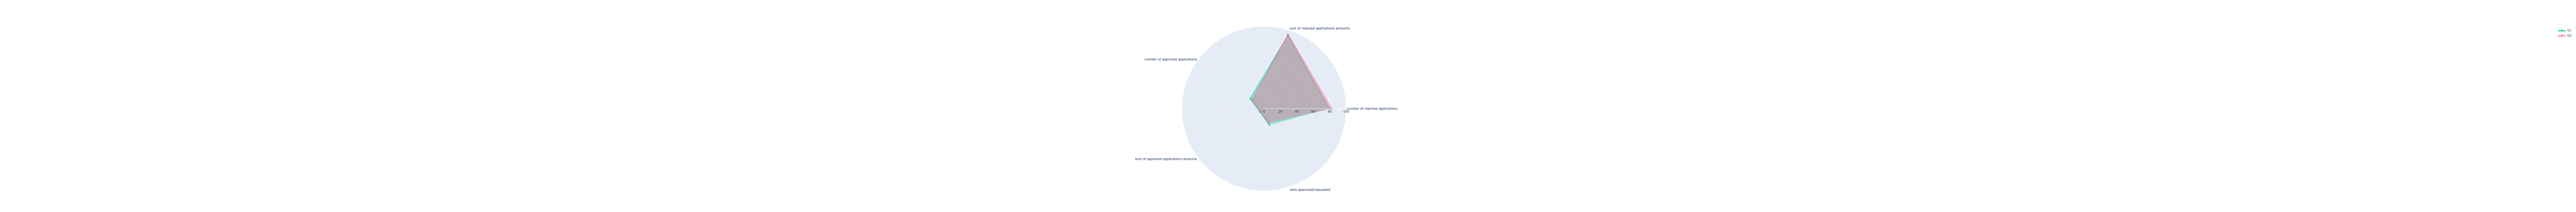

In [18]:
fig = go.Figure()

#radar dimension normalization 
radar_max_value = 100

values = np.array([[rejected_loan[0], rejected_loan_amount[0], approved_loan[0], approved_loan_amount[0], approved_loan[0]/(approved_loan[0]+rejected_loan[0])],
                   [rejected_loan[1], rejected_loan_amount[1], approved_loan[1], approved_loan_amount[1], approved_loan[1]/(approved_loan[1]+rejected_loan[1])],
                   [
                    max(datasink_v2.shape[0], datasink_v1.shape[0]), 
                    max(datasink_v2[get_decision_amount_v2].sum(), datasink_v1[get_decision_amount_v1].sum()), 
                    max(datasink_v2.shape[0], datasink_v1.shape[0]),
                    max(datasink_v2[get_decision_amount_v2].sum(), datasink_v1[get_decision_amount_v1].sum()), 
                    1
                   ]
                  ])
normed_values = (values*radar_max_value) / values.max(axis=0)

def radar_normalization(values, max_value):
    normalized_values = []
    for value in values:
        normalized_values.append((value*max_value)/max(values))
    return normalized_values

fig.add_trace(go.Scatterpolar(
      r=normed_values[0],
      theta=radar_chart_labels,
      marker_color='rgb(0,204,150)',
      fillcolor='rgba(0,204,150,0.4)',
      fill='toself',
      name='V1',
))
fig.add_trace(go.Scatterpolar(
      r=normed_values[1],
      theta=radar_chart_labels,
      marker_color='rgb(255, 102, 146)',
      fillcolor='rgba(255, 102, 146,0.4)',
      fill='toself',
      name='V2'
))

fig.update_layout(
  height=800,
  polar=dict(
    #bgcolor= 'rgb(239, 239, 232)',
    radialaxis=dict(
      visible=True,
      range=[0, radar_max_value],
      #linecolor='red',
      #gridcolor='red',
      #axiscolor='red',
      #tickcolor='red',
    )),
  #showlegend=False
)

fig.show()

__VIOLIN PLOT__

__VIOLIN FIRST VARIANT__ FOR LOAN AMOUNT

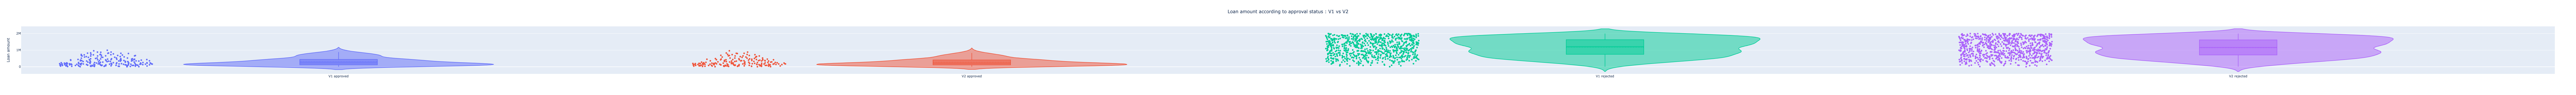

In [19]:
subplot_titles = ['V1 approved', 'V2 approved', 'V1 rejected', 'V2 rejected']
select_decision_approval_status = [select_approved_decision_v1, select_approved_decision_v2, select_rejected_decision_v1, select_rejected_decision_v2]
datasink =[datasink_v1, datasink_v2, datasink_v1, datasink_v2]
get_decision_value = [get_decision_amount_v1, get_decision_amount_v2, get_decision_amount_v1, get_decision_amount_v2] # Y value 

fig = go.Figure()
for idx, approval in enumerate(select_decision_approval_status):
    fig.add_trace(go.Violin(y=datasink[idx].query(approval)[get_decision_value[idx]],
                            name=subplot_titles[idx],
                            box_visible=True,
                            meanline_visible=True,
                            points='all'
                            ))

fig.update_yaxes(title_text='Loan amount')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"Loan amount according to approval status : V1 vs V2",
          'x':0.5,
          'xanchor': 'center'
    })

fig.show()

__VIOLIN SECOND VARIANT__ FOR LOAN AMOUNT

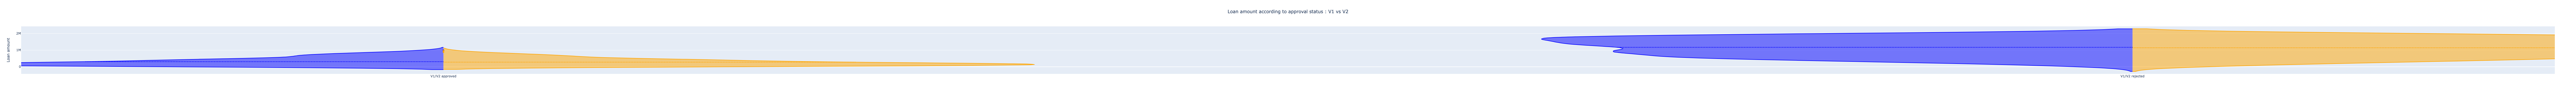

In [20]:
subplot_titles = ['V1/V2 approved', 'V1/V2 rejected']
select_decision_approval_status = [select_approved_decision_v1, select_rejected_decision_v1, select_approved_decision_v2, select_rejected_decision_v2]
datasink =[datasink_v1, datasink_v2]

fig = go.Figure()
for idx in range(0,2):
    fig.add_trace(go.Violin(y=datasink_v1.query(select_decision_approval_status[idx])[get_decision_amount_v1],
                            name=subplot_titles[idx],
                            legendgroup=subplot_titles[idx], scalegroup=subplot_titles[idx],
                            side='negative',
                            line_color='blue')
                )
    fig.add_trace(go.Violin(y=datasink_v2.query(select_decision_approval_status[idx+2])[get_decision_amount_v2],
                            name=subplot_titles[idx],
                            legendgroup=subplot_titles[idx], scalegroup=subplot_titles[idx],
                            side='positive',
                            line_color='orange')
                )

fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_yaxes(title_text='Loan amount')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"Loan amount according to approval status : V1 vs V2",
          'x':0.5,
          'xanchor': 'center'
    })
fig.show()

__VIOLIN VARIANT FOR CREDIT SCORE__

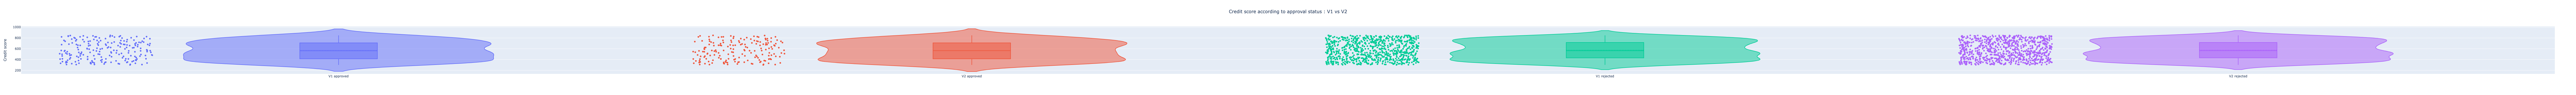

In [21]:
subplot_titles = ['V1 approved', 'V2 approved', 'V1 rejected', 'V2 rejected']
select_decision_approval_status = [select_approved_decision_v1, select_approved_decision_v2, select_rejected_decision_v1, select_rejected_decision_v2]
datasink =[datasink_v1, datasink_v2, datasink_v1, datasink_v2]
get_decision_value = [get_decision_borrower_credit_score_v1, get_decision_borrower_credit_score_v2, get_decision_borrower_credit_score_v1, get_decision_borrower_credit_score_v2] # Y value 

fig = go.Figure()
for idx, approval in enumerate(select_decision_approval_status):
    fig.add_trace(go.Violin(y=datasink[idx].query(approval)[get_decision_value[idx]],
                            name=subplot_titles[idx],
                            box_visible=True,
                            meanline_visible=True,
                            points='all'
                            ))

fig.update_yaxes(title_text='Credit score')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"Credit score according to approval status : V1 vs V2",
          'x':0.5,
          'xanchor': 'center'
    })

fig.show()

__LOAN REQUEST MAPBOX__

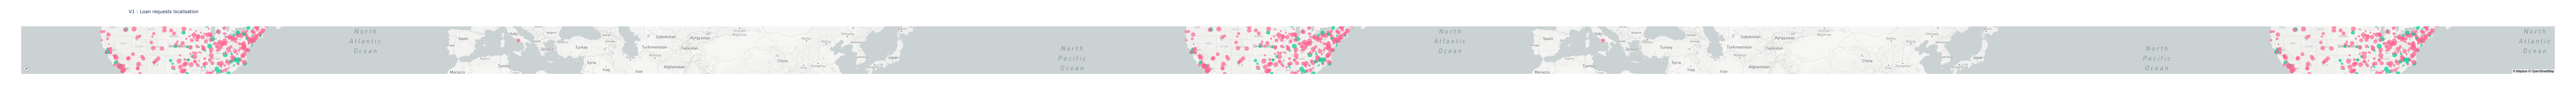

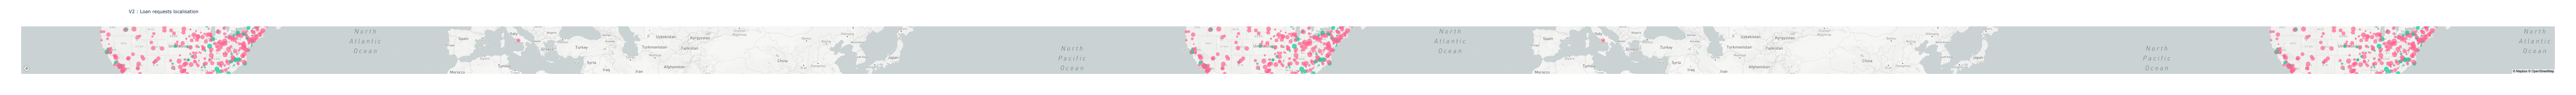

In [22]:
mapbox_access_token = "pk.eyJ1IjoiZGVtYmVsZXQiLCJhIjoiY2t0Mm5oeWo4MGx6ODJ3cXAwejNtMTFncCJ9.9cyxovpJjJUINMrw4ofe_g"

nomi = pgeocode.Nominatim('us')

df1=nomi.query_postal_code(datasink_v1[get_decision_borrower_zipcode_v1].values)

fig1 = go.Figure(data=go.Scattermapbox(
        lon = df1['longitude'],
        lat = df1['latitude'],
        text = df1['place_name'],
        mode = 'markers',
        marker=go.scattermapbox.Marker(
            size=array_normalize(datasink_v1[get_decision_borrower_credit_score_v1], 20),
            color=set_colors(datasink_v1[get_decision_approval_v1])
        ),
        ))

fig1.update_layout(
    title='V1 : Loan requests localisation',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=df1['latitude'].mean(),
            lon=df1['longitude'].mean()
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)
fig1.show()


df2=nomi.query_postal_code(datasink_v2[get_decision_borrower_zipcode_v2].values)

fig2 = go.Figure(data=go.Scattermapbox(
        lon = df2['longitude'],
        lat = df2['latitude'],
        text = df2['place_name'],
        mode = 'markers',
        marker=go.scattermapbox.Marker(
            size=array_normalize(datasink_v2[get_decision_borrower_credit_score_v2], 20),
            color=set_colors(datasink_v2[get_decision_approval_v2])
        ),
        ))

fig2.update_layout(
    title='V2 : Loan requests localisation',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=df2['latitude'].mean(),
            lon=df2['longitude'].mean()
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)
fig2.show()

RULES COVERAGE

In [23]:
def get_rules(record):
    rules = []
    if record["recordType"]=="Rule":
        rules.append(record)
    else:
        if "nestedRecords" in record["properties"]:
            for new_record in record["properties"]["nestedRecords"]:
                rules.extend(get_rules(new_record))
    
    return rules

In [24]:
rules_v1 = []
rules_v2 = []

for number_of_decision in range(0,len(outputDataV1)):
    nested_records = outputDataV1[number_of_decision]['trace']['rootRecord']['properties']['nestedRecords']
    for record in nested_records:
        rules_v1.extend(get_rules(record))

for number_of_decision in range(0,len(outputDataV2)):
    nested_records = outputDataV2[number_of_decision]['trace']['rootRecord']['properties']['nestedRecords']
    for record in nested_records:
        rules_v2.extend(get_rules(record))

In [25]:
rules_counter_v1 = dict()
rules_counter_v2 = dict()

for rule in rules_v1:
    if rule['properties']['name'] in rules_counter_v1:
        rules_counter_v1[rule['properties']['name']] += 1
    else :
        rules_counter_v1[rule['properties']['name']] = 1

for rule in rules_v2:
    if rule['properties']['name'] in rules_counter_v2:
        rules_counter_v2[rule['properties']['name']] += 1
    else :
        rules_counter_v2[rule['properties']['name']] = 1

rules_coverage_v1 = pd.DataFrame(rules_counter_v1.items(), columns=['Rule', 'Count'])
rules_coverage_v1['Percentage']= (rules_coverage_v1['Count']*100)/datasink_v1.shape[0]

rules_coverage_v2 = pd.DataFrame(rules_counter_v2.items(), columns=['Rule', 'Count'])
rules_coverage_v2['Percentage']= (rules_coverage_v2['Count']*100)/datasink_v2.shape[0]

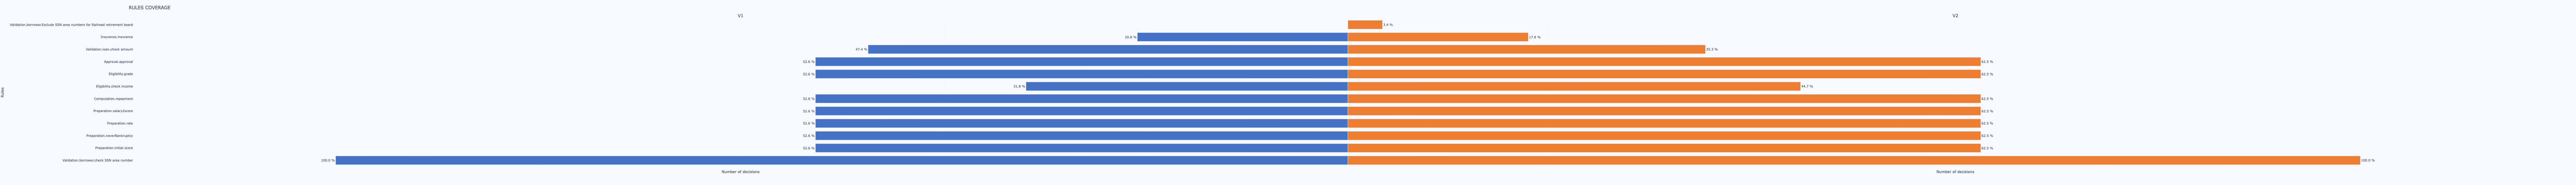

In [26]:
trace_bar_v1 = go.Bar(
            x=rules_coverage_v1["Count"],
            y=rules_coverage_v1["Rule"],
            text=[f'{item} %' for item in rules_coverage_v1['Percentage']],
            textposition="outside",
            hovertemplate="<b>%{y}</b><br><b>Count:</b> %{x}<br><b>Percentage:</b> %{text}<extra></extra>",
            orientation='h',
            width=0.7, 
            showlegend=False, 
            marker_color='#4472c4')

trace_bar_v2 = go.Bar(
            x=rules_coverage_v2["Count"],
            y=rules_coverage_v2["Rule"],
            text=[f'{item} %' for item in rules_coverage_v2['Percentage']],
            textposition="outside",
            hovertemplate="<b>%{y}</b><br><b>Count:</b> %{x}<br><b>Percentage:</b> %{text}<extra></extra>",
            orientation='h',
            width=0.7, 
            showlegend=False, 
            marker_color='#ed7d31')

fig = make_subplots(rows=1, cols=2,
                    specs=[[{}, {}]],
                    shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0,
                    subplot_titles=("V1", "V2")
                    )

fig.append_trace(trace_bar_v1, row=1, col=1)
fig.append_trace(trace_bar_v2, row=1, col=2)

fig.update_xaxes(showticklabels=False, title_text="Number of decisions", row=1, col=1, range=[datasink_v1.shape[0]*1.2, 0])
fig.update_xaxes(showticklabels=False, title_text="Number of decisions", row=1, col=2, range=[0, datasink_v2.shape[0]*1.2])
fig.update_yaxes(title_text="Rules", row=1, col=1)

fig.update_layout(
    title='RULES COVERAGE',
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=50, t=70, b=70),
    height=700,
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

fig.show()

RULES COVERAGE DIFFERENCE 

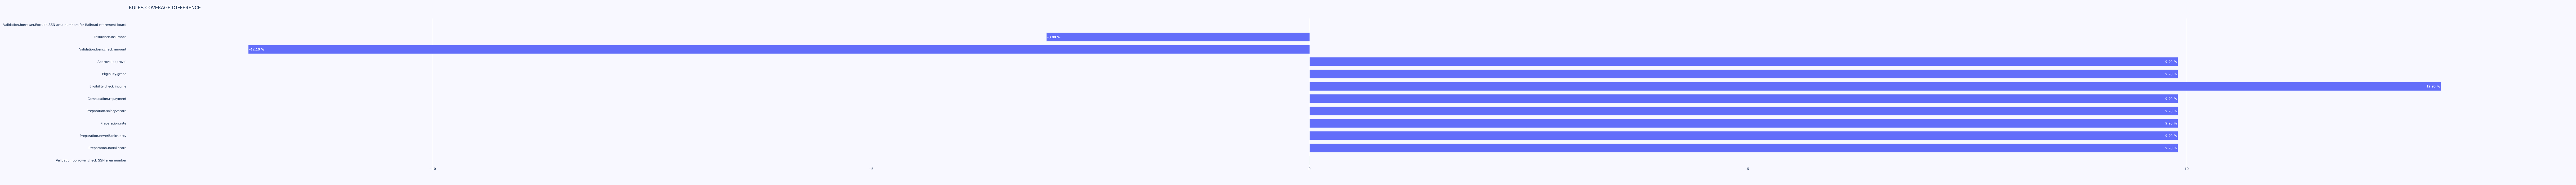

In [27]:
fig = go.Figure(go.Bar(
            x=rules_coverage_v2["Percentage"]-rules_coverage_v1["Percentage"],
            y=rules_coverage_v2["Rule"] if (len(rules_coverage_v2["Rule"])>=len(rules_coverage_v1["Rule"])) else rules_coverage_v1["Rule"],
            text=['{:.2f} %'.format(item) for item in (rules_coverage_v2['Percentage']-rules_coverage_v1['Percentage'])], 
            textposition="inside",
            hovertemplate="<b>%{y}</b><br><b>Count:</b> %{x}<br><b>Percentage:</b> %{text}<extra></extra>",
            width=0.7, 
            showlegend=False,
            orientation='h'))

fig.update_layout(
    title='RULES COVERAGE DIFFERENCE',
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=50, t=70, b=70),
    height=700,
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

fig.show()